# Using R with Python

So far we have been working with Python for all our data handling needs. 


For time series analysis, R statistical libraries are vastly superior and easier to tune.


We are going to learn how to run R commands and pass information to and from R cells.

First you need to run the following commands in the shell:
```
brew install cask
brew cask install xquartz
brew tap homebrew/science
brew install r
pip install rpy2
```

In [1]:
import numpy as np
# Some magic commands to set up.
%load_ext rpy2.ipython
%R require(ggplot2)

//anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

First a couple of examples of using Python and R in conjunction.

In [2]:
Z = np.array([1,4,5,10]) # Python code

%R -i Z print(mean(Z)) # R code, converting Z
%R -o W W=Z*mean(Z) # Here we are passing back W from R to Python.
print W 

[1] 5


[  5.  20.  25.  50.]


In [3]:
%%R
# MASS library is full of interesting datasets and functions.
# Some of them you have already being using with Python.
library(MASS)

In [4]:
%%R
#Looks familiar?
print(head(Boston))

     crim zn indus chas   nox    rm  age    dis rad tax ptratio  black lstat
1 0.00632 18  2.31    0 0.538 6.575 65.2 4.0900   1 296    15.3 396.90  4.98
2 0.02731  0  7.07    0 0.469 6.421 78.9 4.9671   2 242    17.8 396.90  9.14
3 0.02729  0  7.07    0 0.469 7.185 61.1 4.9671   2 242    17.8 392.83  4.03
4 0.03237  0  2.18    0 0.458 6.998 45.8 6.0622   3 222    18.7 394.63  2.94
5 0.06905  0  2.18    0 0.458 7.147 54.2 6.0622   3 222    18.7 396.90  5.33
6 0.02985  0  2.18    0 0.458 6.430 58.7 6.0622   3 222    18.7 394.12  5.21
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7


In [5]:
%%R
print(Boston[1:10, c("crim", "nox")])

      crim   nox
1  0.00632 0.538
2  0.02731 0.469
3  0.02729 0.469
4  0.03237 0.458
5  0.06905 0.458
6  0.02985 0.458
7  0.08829 0.524
8  0.14455 0.524
9  0.21124 0.524
10 0.17004 0.524


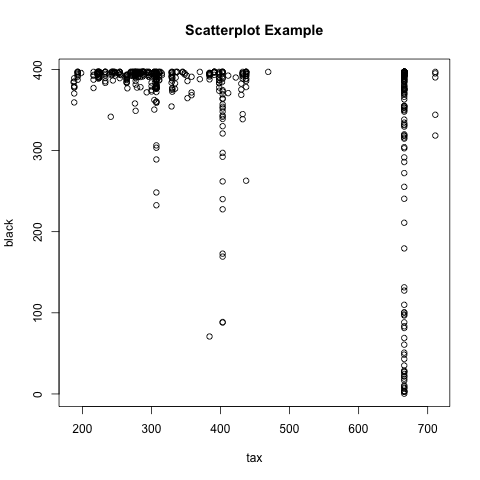

In [6]:
%%R
plot(Boston$tax, Boston$black, main="Scatterplot Example", 
  	 xlab="tax", ylab="black")

In [7]:
%%R
# We get the dataset from Wednesday.
dat = read.csv("datasets/rossmann.csv", header = TRUE)

In [8]:
%%R
# Check that it looks fine.
head(dat)

  Store DayOfWeek       Date Sales Customers Open Promo StateHoliday
1     1         5 2015-07-31  5263       555    1     1            0
2     2         5 2015-07-31  6064       625    1     1            0
3     3         5 2015-07-31  8314       821    1     1            0
4     4         5 2015-07-31 13995      1498    1     1            0
5     5         5 2015-07-31  4822       559    1     1            0
6     6         5 2015-07-31  5651       589    1     1            0
  SchoolHoliday
1             1
2             1
3             1
4             1
5             1
6             1


In [9]:
%%R
# We do some filtering on the dataset
store_1_open <- dat[dat$Store == "1" & dat$Open == "1", c("Date", "Sales")]
head(store_1_open)

           Date Sales
1    2015-07-31  5263
1116 2015-07-30  5020
2231 2015-07-29  4782
3346 2015-07-28  5011
4461 2015-07-27  6102
6691 2015-07-25  4364


In [12]:
%%R
# We need to also install the xts library to easily convert a R dataframe
# into a R timeseries
install.packages("xts", repos="http://R-Forge.R-project.org")
require("xts")

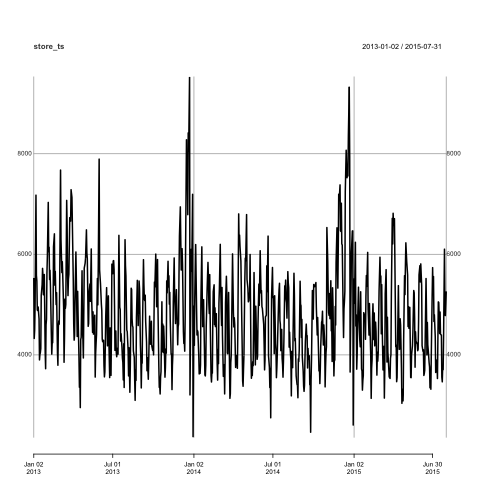

In [13]:
%%R
# We coerce date into a date type and then create the time_series.
store_1_open$Date <- as.Date(as.character(store_1_open$Date),format="%Y-%m-%d")
store_ts <- xts(store_1_open$Sales, store_1_open$Date)
plot(store_ts)

#  Arima modeling in R.

In [15]:
%%R
# Now we install and "import" the forecasting library.
# Docs: https://cran.r-project.org/web/packages/forecast/forecast.pdf
install.packages("forecast", repos="http://R-Forge.R-project.org")
require("forecast")

In [16]:
%%R
# Www usage dataset (included in the forecast library)
WWWusage

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1]  88  84  85  85  84  85  83  85  88  89  91  99 104 112 126 138 146 151
 [19] 150 148 147 149 143 132 131 139 147 150 148 145 140 134 131 131 129 126
 [37] 126 132 137 140 142 150 159 167 170 171 172 172 174 175 172 172 174 174
 [55] 169 165 156 142 131 121 112 104 102  99  99  95  88  84  84  87  89  88
 [73]  85  86  89  91  91  94 101 110 121 135 145 149 156 165 171 175 177 182
 [91] 193 204 208 210 215 222 228 226 222 220


If the next cell generates an error, go to the shell, run

`R`     

(Capital R, not r) (this gets into R) Inside R, run

`install.packages("forecast")`

Select option `1`.  This will take a while and print a huge output!

After it finishes, quit R

`> quit()`

No need to save workspace image.

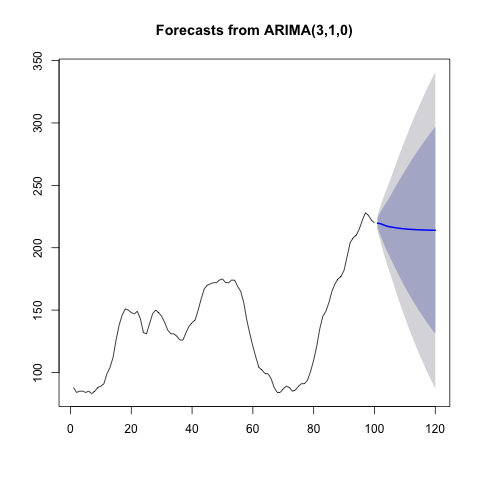

In [17]:
%%R
# First example, fitting ARIMA without seasonality.
fit <- Arima(WWWusage,order=c(3,1,0))
    plot(forecast(fit,h=20))

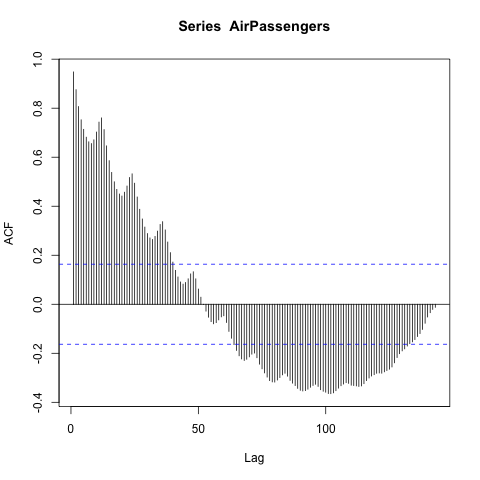

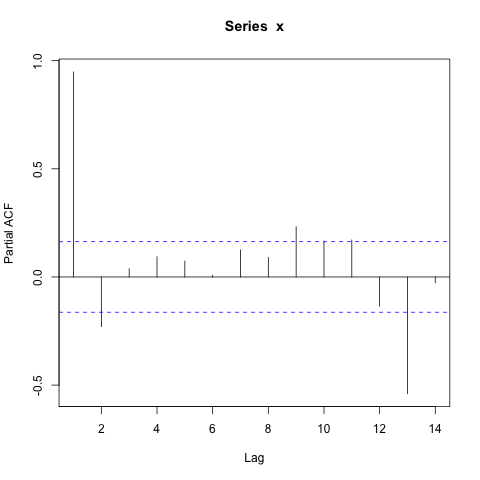

In [18]:
%%R
# We are going to use the AirPassengers dataset for fitting seasonal arima models.

# First we look at the ACF and PACF plots.
Acf(AirPassengers,lag.max=365)
Pacf(AirPassengers,lag.max=14)

Series: window(AirPassengers, end = 1956) 
ARIMA(0,1,1)(0,1,1)[12]                    
Box Cox transformation: lambda= 0 

Coefficients:
          ma1     sma1
      -0.3987  -0.6313
s.e.   0.1237   0.1312

sigma^2 estimated as 0.001732:  log likelihood=124.73
AIC=-243.46   AICc=-243.1   BIC=-236.63


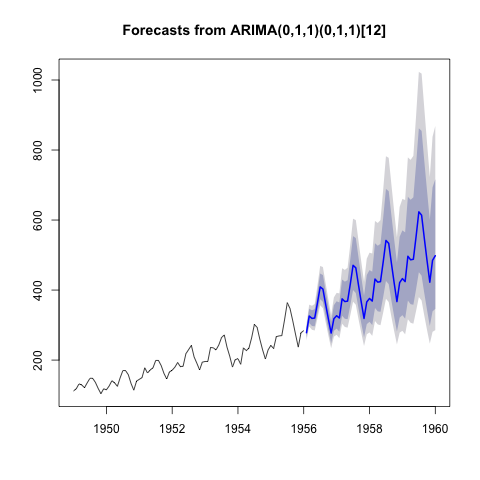

In [19]:
%%R
# Fit model to first few years of AirPassengers data on a model, including seasonality.
air.model <- Arima(
    window(AirPassengers,end=1956),order=c(0,1,1),
    seasonal=list(order=c(0,1,1),period=12),lambda=0
)
print(air.model)
plot(forecast(air.model,h=48))

Series: window(AirPassengers, start = 1957) 
ARIMA(0,1,1)(0,1,1)[12]                    
Box Cox transformation: lambda= 0 

Coefficients:
          ma1     sma1
      -0.3987  -0.6313
s.e.   0.0000   0.0000

sigma^2 estimated as 0.001732:  log likelihood=67.71
AIC=-133.42   AICc=-133.3   BIC=-131.87


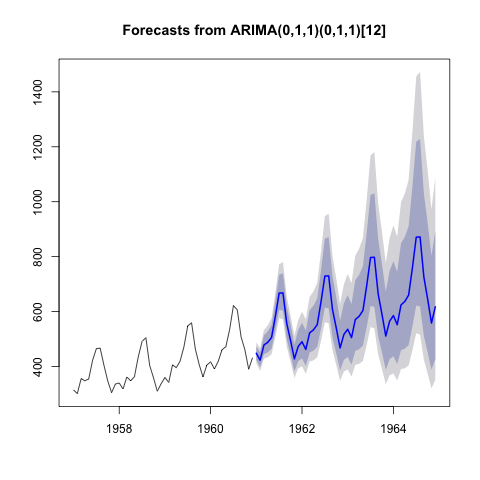

In [20]:
%%R
# Apply fitted model to later data
air.model2 <- Arima(
    window(AirPassengers,start=1957),
    model=air.model
)
print(air.model2)
plot(forecast(air.model2,h=48))

In [21]:
%%R
# Forecast accuracy measures on the log scale.
print("in-sample one-step forecasts:")
print(accuracy(air.model))
print("out-of-sample one-step forecasts:")
print(accuracy(air.model2))
print("out-of-sample multi-step forecasts")
accuracy(forecast(air.model,h=48,lambda=NULL),
         log(window(AirPassengers,start=1957)))

[1] "in-sample one-step forecasts:"
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.6046626 8.042766 5.902373 0.2325499 2.824685 0.2193855
                   ACF1
Training set 0.04709978
[1] "out-of-sample one-step forecasts:"
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.5331508 12.06178 8.105989 0.0832407 1.892018 0.2256888
                   ACF1
Training set -0.2161917
[1] "out-of-sample multi-step forecasts"
                     ME     RMSE       MAE        MPE     MAPE        MASE
Training set  0.6046626 8.042766 5.9023727  0.2325499 2.824685 0.219385544
Test set     -0.1180058 0.135892 0.1189691 -1.9835025 1.999327 0.004421968
                   ACF1 Theil's U
Training set 0.04709978        NA
Test set     0.82979537  1.223912


Series: window(AirPassengers, end = 1956) 
ARIMA(1,1,0)(1,1,0)[12]                    

Coefficients:
          ar1     sar1
      -0.2389  -0.2609
s.e.   0.1140   0.1164

sigma^2 estimated as 95.54:  log likelihood=-265.74
AIC=537.49   AICc=537.84   BIC=544.32
[1] "in-sample one-step forecasts:"
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.6913774 8.870232 6.277479 0.2231834 2.962261 0.2333279
                     ACF1
Training set -0.003714505


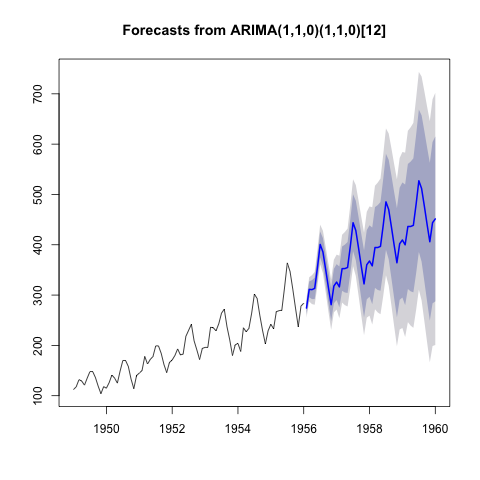

In [22]:
%%R
# Now we try auto.arima to automatically determine the best model specification.
# For more info about how the algo works: https://www.otexts.org/fpp/8/7 
air.model3 <- auto.arima(window(AirPassengers,end=1956))
print(air.model3)
print("in-sample one-step forecasts:")
print(accuracy(air.model3))
plot(forecast(air.model3,h=48))

In [23]:
%%R
# We can also get some measures out of the forecast object.
forecast_model3 <- forecast(air.model3,h=48)
print(forecast_model3)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 1956       274.2226 261.6961 286.7492 255.0649 293.3803
Mar 1956       311.3638 295.6218 327.1059 287.2884 335.4392
Apr 1956       310.8146 292.0302 329.5990 282.0864 339.5428
May 1956       313.3657 292.0486 334.6829 280.7639 345.9676
Jun 1956       354.4555 330.8586 378.0525 318.3671 390.5439
Jul 1956       400.5847 374.9135 426.2560 361.3240 439.8455
Aug 1956       385.6722 358.0814 413.2630 343.4757 427.8688
Sep 1956       350.9331 321.5479 380.3182 305.9924 395.8738
Oct 1956       315.0203 283.9443 346.0964 267.4936 362.5471
Nov 1956       280.8903 248.2107 313.5699 230.9112 330.8694
Dec 1956       317.9767 283.7687 352.1847 265.6601 370.2934
Jan 1957       325.8031 290.1320 361.4741 271.2489 380.3572
Feb 1957       316.2285 275.6379 356.8191 254.1506 378.3064
Mar 1957       352.5501 308.4823 396.6180 285.1541 419.9462
Apr 1957       352.6660 305.1816 400.1505 280.0448 425.2872
May 1957       354.8125 304.1852 405.439

In [24]:
%%R
# We can access several values of the forecast object, like mean, model, etc
print(forecast_model3["model"])
print(forecast_model3["mean"])

$model
Series: window(AirPassengers, end = 1956) 
ARIMA(1,1,0)(1,1,0)[12]                    

Coefficients:
          ar1     sar1
      -0.2389  -0.2609
s.e.   0.1140   0.1164

sigma^2 estimated as 95.54:  log likelihood=-265.74
AIC=537.49   AICc=537.84   BIC=544.32

$mean
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1956          274.2226 311.3638 310.8146 313.3657 354.4555 400.5847 385.6722
1957 325.8031 316.2285 352.5501 352.6660 354.8125 396.9225 443.8007 428.3435
1958 367.6575 358.0300 394.5655 394.5079 396.7599 438.6037 485.2865 469.9714
1959 409.4985 399.8849 436.3645 436.3522 438.5767 480.4899 527.2237 511.8716
1960 451.3431                                                               
          Sep      Oct      Nov      Dec
1956 350.9331 315.0203 280.8903 317.9767
1957 393.5363 357.0790 322.2002 360.3077
1958 435.1820 398.8668 364.1833 402.0244
1959 477.0775 440.7252 405.9908 443.9013
1960                                    



# Individual practice.

- Using at least two datasets from the forecast library:
    - Manually fit an ARIMA model, plotting the ACF, PACF and forecasts.
    - Use auto.arima to fit the same datasets and compare the results. Is the model specification similar to the one you got manually?